In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
df = pd.read_csv("NYC2017_STEWMAP_PublicPoints.csv")
network_df = pd.read_csv("NYC_STEWMAP_2017_Networks_ Connections.csv")
df.head()
network_df.head()

,From,To,Label,Type,Tags,Description,BoundText,Group Focus,MapYN,Mission,...,PopID,PopID _ALTER,Respondent PopID,Sector,Site Type,Stewardship Function,Version,YrFnd_Num,indegree,metrics::last
0,PARTNERSHIPS FOR PARKS,FRIENDS OF 20TH ST PARK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,20296,4878,NaN,NaN,NaN,1,NaN,NaN,NaN
1,CHRISTOPHER PARK ALLIANCE,NYC PARKS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4655,2827,NaN,NaN,NaN,1,NaN,NaN,NaN
2,FRIENDS OF DAG HAMMARSKJOLD PLAZA,NYPD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4664,100748,NaN,NaN,NaN,1,NaN,NaN,NaN
3,INTERNATIONAL RESCUE COMMITTEE- NEW ROOTS COMM...,NY CARES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1351,101272,NaN,NaN,NaN,1,NaN,NaN,NaN
4,URBAN RESOURCES INITIATIVE,FILLMORE STREET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,20281,61343983,NaN,NaN,NaN,1,NaN,NaN,NaN


In [119]:
selected_cols = ['Conserve', 'Manage', 'Transform_','Monitor','Advocate','Educate','Particip']
organization_work_type_df = df[selected_cols]
organization_work_type_df.head()

,Conserve,Manage,Transform_,Monitor,Advocate,Educate,Particip
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.0,0.0,1.0,1.0,1.0,1.0,1.0
4,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [120]:
sum_all_columns = organization_work_type_df.sum()
sum_all_columns.head()

Conserve      259.0
Manage        582.0
Transform_    199.0
Monitor       234.0
Advocate      460.0
dtype: float64

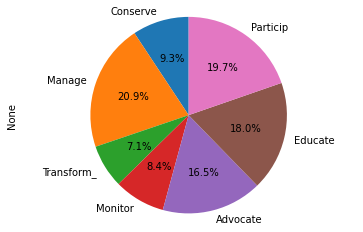

In [121]:
sum_all_columns.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

In [122]:
selected_cols = ['OrgCity', 'OrgTypeTxt']
org_type_df = df[selected_cols]
org_type_df.head()

,OrgCity,OrgTypeTxt
0,Middle Village,501(c)(4) (or has applied)
1,New York,501(c)(4) (or has applied)
2,New Brunswick,501(c)(3) (or has applied)
3,New York,501(c)(3) (or has applied)
4,Bronx,Group without 501(c)(3) or 501(c)(4) status


In [123]:
unique_values = org_type_df['OrgCity'].unique()
print(unique_values)


['Middle Village' 'New York' 'New Brunswick' 'Bronx' nan 'Arverne'
 'Staten Island' 'Brooklyn' 'Flushing' 'Bloomfield' 'Forest Hills'
 'Elmhurst' 'Kew Gardens' 'Rosedale NY' 'Norwalk' 'Loganville' 'brooklyn'
 'Broad Channel' 'City Island' 'Woodhaven' 'bronx' 'Hyde Park' 'BROOKLYN'
 'Little Neck' 'new york' 'Long Island City' 'Rockaway Park'
 'Jackson Heights' 'Yonkers' 'Manhattan' 'Patchogue' 'Bayside'
 'ROCKAWAY PARK' 'Corona' 'Richmond Hill' 'Westport' 'Queens' 'Rosedale'
 'Hamilton Beach' 'College Park' 'Vienna' 'Far Rockaway' 'Newburgh'
 'Chappaqua' 'Stockholm' 'Upper Montclair' 'Briarwood' 'staten island'
 'Newfoundland' 'Ridgewood' 'Montclair' 'South Orange' 'NEW YORK'
 'E. Elmhurst' 'Jackson' 'Pennington' 'Boonton' 'Bernardsville' 'Ringoes'
 'Sunnyside' 'Patterson' 'Douglaston' 'Cornwall' 'Nyack' 'Teaneck'
 'Jersey City' 'Westfield' 'Hauppauge' 'Bedford' 'flushing'
 'hamilton beach' 'New york' 'Morristown' 'Gladstone NJ' 'Edison'
 'Brewster' 'Amityville' 'Bethany' 'Calverton' 'G

In [124]:
grouped_data = org_type_df.groupby(['OrgCity', 'OrgTypeTxt'])
count_data = grouped_data.size()
count_data.head()


OrgCity     OrgTypeTxt                
Accord      501(c)(3) (or has applied)    1
Amityville  501(c)(3) (or has applied)    1
Andover     501(c)(3) (or has applied)    1
Annandale   501(c)(3) (or has applied)    1
Arverne     501(c)(3) (or has applied)    3
dtype: int64

In [125]:
sorted_data = count_data.sort_values(ascending=False).reset_index()

sorted_data_20 = sorted_data.head(20)
sorted_data_20

,OrgCity,OrgTypeTxt,0
0,New York,501(c)(3) (or has applied),134
1,Brooklyn,501(c)(3) (or has applied),107
2,Brooklyn,Group without 501(c)(3) or 501(c)(4) status,54
3,New York,Group without 501(c)(3) or 501(c)(4) status,49
4,Bronx,501(c)(3) (or has applied),32
5,Staten Island,501(c)(3) (or has applied),25
6,Bronx,Group without 501(c)(3) or 501(c)(4) status,19
7,Brooklyn,Other,18
8,New York,Other,13
9,Bronx,School-affiliated group,13


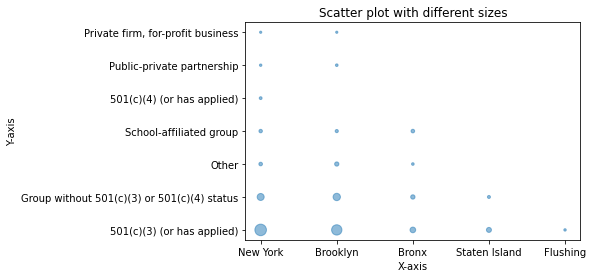

In [126]:

plt.scatter(sorted_data_20['OrgCity'], sorted_data_20['OrgTypeTxt'], s=sorted_data_20[0], alpha=0.5)

# set the labels and title of the plot
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter plot with different sizes')

# show the plot
plt.show()

1 = 501(c)(3) (or has applied)
2 = 501(c)(4) (or has applied)
3 = Community group/organization without 501(c)(3) or 501(c)(4) status (such as a block club)
4 = School district
5 = Federal government agency
6 = State government agency
7 = Local government agency
8 = Public institution (not an agency)
9 = Quasi governmental organization (such as a port authority)
10 = Private firm, for-profit business501(c)(3) (or has applied)
11 = Other, see "OrgType_Other"

In [127]:
selected_cols = ['BoundText']
boundaries_df = df[selected_cols]
boundaries_df.head(20)

,BoundText
0,"On the north,The Long Island Expressway\nOn th..."
1,shore rad between 69st an shore road at 72 st
2,The LRWP focuses stewardship activities in the...
3,Metropolitan New York/NJ
4,Meg's Garden and Edible Forest at north end of...
5,The community garden inside North Pacific Play...
6,We manage the gardens on the East River Esplan...
7,NaN
8,"We work citywide, but in the last year, mostly..."
9,Montefiore Park Neighborhood. 133 Street to 1...


Notes: Used to map polygons, in addition to polygons created by respondents in Maptionnaire. Not all groups mapped their turfs, so the STEW-MAP team mapped turfs from these descriptions.

How did they make the turfs based on these descriptions?
Are these decriptions useful to my project? How can I use them? Difficult level?

In [128]:
selected_cols = ['OrgName','OrgCity','PS_Wtershd','PS_Stream','PS_Shrline']
projsite_df = df[selected_cols]
projsite_df.head(20)

,OrgName,OrgCity,PS_Wtershd,PS_Stream,PS_Shrline
0,Juniper Park Civic Association,Middle Village,0.0,0.0,0.0
1,Narrows Botanical Garden,New York,0.0,0.0,0.0
2,Lower Raritan Watershed Partnership,New Brunswick,1.0,1.0,0.0
3,Waterfront Alliance,New York,1.0,1.0,0.0
4,Baldwin Learning Center (BLC) Coalition,Bronx,0.0,0.0,0.0
5,North Pacific Garden,NaN,0.0,0.0,0.0
6,Green Park Gardeners NY,New York,0.0,1.0,0.0
7,Friends of Arverne,Arverne,0.0,0.0,0.0
8,Green Map NYC,New York,1.0,0.0,0.0
9,Montefiore Park Neighborhood Association,New York,0.0,0.0,0.0


To do: Create project categories and group projects name - water, land, system, other.

In [129]:
selected_cols = ['OrgName','OrgCity','PS_Wtershd','PS_Stream','PS_Shrline','PS_Wetland',
                 'PSSaltMrsh','PS_Forest','PS_Park','PS_CommGrd','PS_UrbFarm','PS_VacLot',
                 'PS_Brwnfld','PS_Ballfld','PS_PlayFld','PS_DogPark','PS_PubGrdn','PS_Grnways',
                 'PS_PROW','PS_StrTree','PS_Planter','PS_ResBldg','PS_Schlyrd','PS_PubBldg','PS_Crtyard',
                 'PS_GrnRoof','PS_GrnBldg','PS_WsteSys','PS_FdSys','PS_StrmWtr','PS_Atmsphr',
                 'PS_Other','PS_None','PS_EnrgySy']
projsite_df = df[selected_cols]

def water_proj_df(row):
    if row['PS_Stream'] or row['PS_Shrline'] or row['PS_Wetland'] or row['PSSaltMrsh']:
        return 1
    else:
        return 0

def land_proj_df(row):
    if row['PS_Forest'] or row['PS_Park'] or row['PS_CommGrd'] or row['PS_UrbFarm'] or row['PS_VacLot']\
        or row['PS_Brwnfld'] or row['PS_Ballfld'] or row['PS_PlayFld'] or row['PS_DogPark']\
        or row['PS_PubGrdn'] or row['PS_Grnways'] or row['PS_PROW'] or row['PS_StrTree'] or row['PS_Planter'] or row['PS_ResBldg']\
        or row['PS_Schlyrd'] or row['PS_PubBldg'] or row['PS_Crtyard'] or row['PS_GrnRoof'] or row['PS_GrnBldg']:
        return 1
    else:
        return 0
    
def system_proj_df(row):
    if row['PS_WsteSys'] or row['PS_FdSys'] or row['PS_StrmWtr'] or row['PS_Atmsphr'] or row['PS_EnrgySy']:
        return 1
    else:
        return 0
    
def other_proj_df(row):
    if row['PS_Other']:
        return 1
    else:
        return 0

def none_proj_df(row):
    if row['PS_None']:
        return 1
    else:
        return 0
# Apply function to each row to compute age in dog years
projsite_df['water_proj'] = projsite_df.apply(water_proj_df, axis=1)
projsite_df['land_proj'] = projsite_df.apply(land_proj_df, axis=1)
projsite_df['system_proj'] = projsite_df.apply(system_proj_df, axis=1)
projsite_df['other_proj'] = projsite_df.apply(other_proj_df, axis=1)
projsite_df['none_proj'] = projsite_df.apply(none_proj_df, axis=1)

selected_cols = ['water_proj','land_proj','system_proj','other_proj','none_proj']
categorized_df = projsite_df[selected_cols]
categorized_df.head(20)

sums = categorized_df.sum().reset_index()

print(sums)


         index    0
0   water_proj  146
1    land_proj  650
2  system_proj  291
3   other_proj  128
4    none_proj   52


/var/folders/7z/vm12cxqd2yl525737jxldqf80000gn/T/ipykernel_70522/2699552987.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  projsite_df['water_proj'] = projsite_df.apply(water_proj_df, axis=1)
/var/folders/7z/vm12cxqd2yl525737jxldqf80000gn/T/ipykernel_70522/2699552987.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  projsite_df['land_proj'] = projsite_df.apply(land_proj_df, axis=1)
/var/folders/7z/vm12cxqd2yl525737jxldqf80000gn/T/ipykernel_70522/2699552987.py:44: SettingWithCopyWarning: 
A value is

To do: For each category, visualize how many projects have been done by organizations 

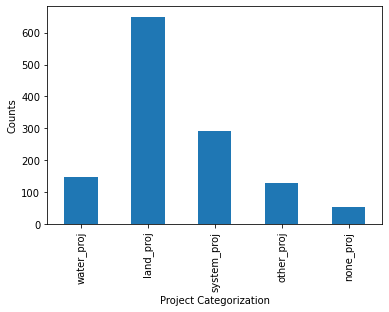

In [130]:
ax = sums.plot(kind='bar', x="index", y=0, legend=False)

# set chart title and axis labels
ax.set_xlabel('Project Categorization')
ax.set_ylabel('Counts')

# show the chart
plt.show()

Opportunity: 1. Three maps on the density of water, land, system in each city

In [131]:
selected_cols = ['OrgName','OrgCity','water_proj','land_proj','system_proj','other_proj','none_proj']
categorized_df = projsite_df[selected_cols]
categorized_df.head(20)

grouped_data = categorized_df.groupby(['OrgCity'])
count_data = grouped_data.sum()
sorted_data = count_data.sort_values('land_proj',ascending=False).reset_index()

sorted_data.head(8)



,OrgCity,water_proj,land_proj,system_proj,other_proj,none_proj
0,New York,29,174,85,32,16
1,Brooklyn,18,159,71,27,9
2,Bronx,16,67,27,11,3
3,Staten Island,10,36,11,11,4
4,BROOKLYN,1,8,1,1,1
5,Flushing,1,7,4,3,1
6,Forest Hills,0,5,0,0,1
7,Long Island City,0,5,3,0,1


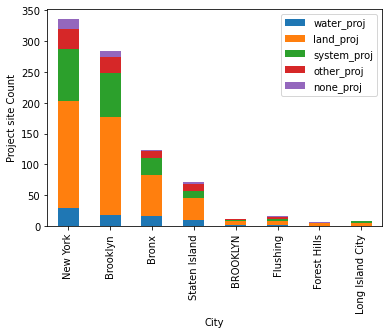

In [132]:
ax = sorted_data.head(8).plot(kind='bar', x='OrgCity', stacked=True)

# set chart title and axis labels
ax.set_xlabel('City')
ax.set_ylabel('Project site Count')

# show the chart
plt.show()

Questions: Why there's almost no data of Manhattan? One guess - Does organizations in Manhattan count themselves as New York when they fill in the survey?
How can I clean data of this? Should I delete New York since it's not the same level as other cities? 
Or should I focus on the map as points and networks?

Notes from meeting- 
Use other Regional division， eg.State wide, columns that describe how big the region is.
"City" somestimes not make sense, try to use other columns. 
Direction - Use Analyzed data, and web implementation 

A huge part to learn GIS, not worth it
turfs? spatial analysis lots of details and kind of messed up 

After the analysis, can connect to Michel XXX who created the map?? She'd like to give more thoughts and idea

In [133]:
selected_cols = [
    # 'OrgName','OrgCity',
    "OF_Animal",
    "OF_Arts",
    "OF_CommImp",
    "OF_Crime",
    "OF_EconDev",
    "OF_Educ",
    "Of_ER",
    "OF_Employ",
    "OF_EngyEff",
    "OF_Environ",
    "OF_Faith",
    "OF_Food",
    "OF_Housing",
    "OF_HumServ",
    "OF_LeglSrv",
    "OF_PwrGen",
    "OF_GrantPR",
    "OF_PubHlth",
    "OF_SprtRec",
    "OF_RandD",
    "OF_Senior",
    "OF_Pollute",
    "OF_Transpo",
    "OF_Youth",
    "OrgFnOther",
]
org_func_df = df[selected_cols]
# org_func_df.head(20)

count_data = org_func_df.sum()
sorted_data = count_data.sort_values(0,ascending=False).reset_index()
sorted_data.head(20)

/var/folders/7z/vm12cxqd2yl525737jxldqf80000gn/T/ipykernel_70522/634949138.py:33: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only
  sorted_data = count_data.sort_values(0,ascending=False).reset_index()


,index,0
0,OF_Environ,456.0
1,OF_CommImp,418.0
2,OF_Educ,384.0
3,OF_Arts,256.0
4,OF_Youth,247.0
5,OF_Food,198.0
6,OF_SprtRec,152.0
7,OF_EconDev,105.0
8,OF_Senior,103.0
9,OrgFnOther,96.0


In [134]:
selected_cols = ['PrimFocus']
focus_df = df[selected_cols]

grouped_data = focus_df.groupby(['PrimFocus'])
count_data = grouped_data.size()
sorted_data = count_data.sort_values(0,ascending=False).reset_index()

sorted_data.head(20)

/var/folders/7z/vm12cxqd2yl525737jxldqf80000gn/T/ipykernel_70522/2242514452.py:6: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only
  sorted_data = count_data.sort_values(0,ascending=False).reset_index()


,PrimFocus,0
0,Environment,187
1,Community improvement and capacity building,133
2,Education,114
3,Food,53
4,Other,49
5,"Arts, culture, creative practices",41
6,Recreation and sports (including birding and f...,21
7,Youth,21
8,Economic development,19
9,Animal related,10


Need complement data? - Describe relationship between Primary focus and Org function/projects/etc ??  
Combining regional data??

Opportunity: Using zip code for region?????

PctStewTxt  
Considering all of the programs, activities, and services your group works on, what percentage of your group’s effort has been for environmental stewardship during the past year?

/Users/yuxintao/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:8823: RuntimeWarning: divide by zero encountered in log
  return lib.map_infer(x.astype(object)._values, func, ignore_na=ignore_na)


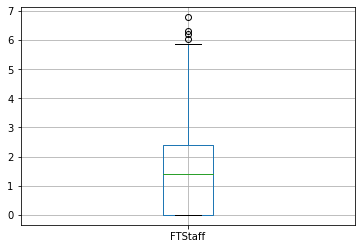

/Users/yuxintao/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:8823: RuntimeWarning: divide by zero encountered in log
  return lib.map_infer(x.astype(object)._values, func, ignore_na=ignore_na)


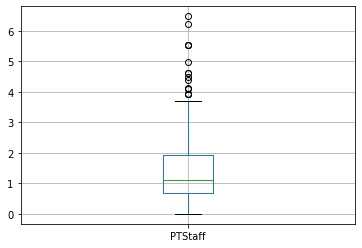

/Users/yuxintao/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:8823: RuntimeWarning: divide by zero encountered in log
  return lib.map_infer(x.astype(object)._values, func, ignore_na=ignore_na)


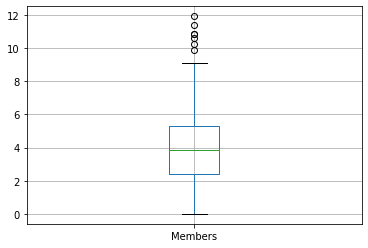

/Users/yuxintao/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:8823: RuntimeWarning: divide by zero encountered in log
  return lib.map_infer(x.astype(object)._values, func, ignore_na=ignore_na)


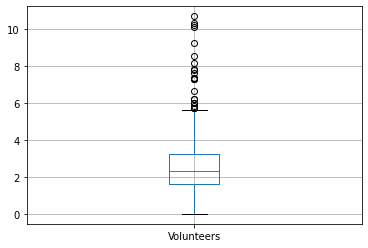

/Users/yuxintao/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:8823: RuntimeWarning: divide by zero encountered in log
  return lib.map_infer(x.astype(object)._values, func, ignore_na=ignore_na)


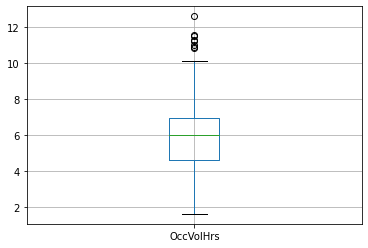

In [135]:

selected_cols = ['FTStaff','PTStaff','Members','Volunteers','OccVolHrs']
staff_df = df[selected_cols]

def staff_plot(col_name):
    # data cleaning
    filtered_df = staff_df[staff_df[col_name] > 0] 

    # transformation
    log_df = filtered_df.applymap(np.log)

    ax = log_df.boxplot(column=[col_name])
    plt.show()

staff_plot('FTStaff')
staff_plot('PTStaff')
staff_plot('Members')
staff_plot('Volunteers')
staff_plot('OccVolHrs')

Opportunity: Combine PrimFocus(x axis) column to create side by side boxplot - to compare FTstaff/PTstaff/etc within each PrimFocus(eg.environmental)

In [136]:
selected_cols = ['RegColl','Knowledge','Funding']
collaboration_df = df[selected_cols]
collaboration_df.head(20)

,RegColl,Knowledge,Funding
0,Newtown Historical Society\nJuniper Valley Par...,Transportation Alturnatives\nJuniper Valley Pa...,Transportation Alternatives\nNew York Landmark...
1,of garden groups,NaN,parks dept
2,Watershed and other local environmental groups...,Institutional Partners\n\nMiddlesex County Cho...,Johnson and Johnson\nThe Watershed Institute\n...
3,Virtually every environmental and environmenta...,Too numerous to name,Confidential
4,DeWitt Clinton High School\nMarpillero Pollak ...,Bronx Green Up\nGreen Thumb\nMarpillero Pollak...,Citizen's Committee of New York City\nGrow to ...
5,NaN,We work with the Parks department and the Broo...,Boerum Hill Neighborhood Association provided ...
6,Friends of the Esplanade (60th - 120th Street)...,Upper Greenside\nCommunity Board 8\nCity Counc...,Friends of the Esplanade\nPartnership 4 Parks\...
7,NaN,NaN,NaN
8,Partnerships for Parks\nSara Roosevelt Park Co...,We get help from so many groups!!,TED\nCivic Hall\nCitizens Committee\nIOBY\nPar...
9,NaN,NaN,NaN


Opportunity: Inspect Network dataset, "From - To" to analysis the average number of collaborated organizations for each organization  
or, which organization has the most collaborated organizations, etc    
RegColl-Please list groups with which you regularly collaborate on environmental projects or programs.  
Knowledge - Please list groups that you go to for knowledge, data, or expertise related to environmental issues.  
Funding - Please list groups from which you have received resources (e.g. funding or materials).

In [137]:
selected_cols = ['Goals']
goal_df = df[selected_cols]
goal_df.head(20)

,Goals
0,Cleaning up railroad abutments \nLess air and ...
1,more active members and funding
2,\nEstablish TMDLs throughout the whole of WMA9...
3,Improve the access for the public and the qual...
4,We want to continue to develop our school grou...
5,A more beautiful and well maintained park in a...
6,To provide habitat for pollinators\nTo contrib...
7,NaN
8,"Better city for all, across the board"
9,NaN


In [138]:
selected_cols = ['Track']
track_df = df[selected_cols]


track_df.head(20)

,Track
0,I don't know
1,I don't know
2,Yes
3,No
4,Yes
5,No
6,Yes
7,NaN
8,Yes
9,No


In [139]:

selected_cols = ['ComPartic','TrustBnNei','InflncPP','PltsHabQy','AirWatQlty','LndPrtctn','UrbnSustn','PlaNYC2007',
                'MTNYC','DEP2010','Vis2020','PlaNYC2013','VZero2014','OneNYC2015','Waste2015','OthPlans' ]
activity_metric_df = df[selected_cols]
activity_metric_df.head(20)

,ComPartic,TrustBnNei,InflncPP,PltsHabQy,AirWatQlty,LndPrtctn,UrbnSustn,PlaNYC2007,MTNYC,DEP2010,Vis2020,PlaNYC2013,VZero2014,OneNYC2015,Waste2015,OthPlans
0,0.0,7.0,6.0,6.0,5.0,6.0,5.0,2.0,6.0,1.0,1.0,1.0,5.0,1.0,3.0,0.0
1,7.0,7.0,0.0,7.0,7.0,6.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,7.0,6.0,5.0,0.0,0.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
3,6.0,6.0,6.0,6.0,6.0,1.0,6.0,7.0,2.0,2.0,7.0,7.0,7.0,7.0,1.0,1.0
4,5.0,5.0,5.0,6.0,5.0,5.0,6.0,5.0,5.0,5.0,3.0,6.0,5.0,5.0,6.0,0.0
5,0.0,0.0,0.0,7.0,5.0,5.0,0.0,2.0,6.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
6,7.0,0.0,7.0,7.0,0.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,7.0,5.0,6.0,5.0,6.0,6.0,6.0,5.0,3.0,6.0,5.0,5.0,7.0,5.0,5.0,7.0
9,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,6.0,7.0,1.0,7.0,7.0,7.0,2.0,7.0


Does your group track metrics about your activities? (e.g., number of trees planted, number of schools visited, number of acres conserved, number of volunteers/event, program satisfaction)?  
Question: Numbers between 1~100 what's the meaning of it?  
1 = 0 - 19%, 2 = 20 - 39%, 3 = 40 - 59%, 4 = 60 - 79%, 5 = 80 - 100%

In [140]:

selected_cols = ['Dr_ExtrWth','DR_CC','Dr_FinanCr','Dr_SocialM','Dr_EO','Dr_NeighDe','Dr_Other','Dr_Text',
                'Dr_NA']
driver_df = df[selected_cols]
driver_df.head(20)

,Dr_ExtrWth,DR_CC,Dr_FinanCr,Dr_SocialM,Dr_EO,Dr_NeighDe,Dr_Other,Dr_Text,Dr_NA
0,6.0,3.0,3.0,5.0,7.0,7.0,0.0,NaN,NaN
1,7.0,7.0,7.0,0.0,0.0,0.0,4.0,NaN,NaN
2,2.0,6.0,1.0,7.0,6.0,7.0,0.0,NaN,NaN
3,7.0,7.0,2.0,2.0,7.0,3.0,1.0,NaN,NaN
4,3.0,5.0,5.0,6.0,4.0,5.0,0.0,NaN,NaN
5,4.0,4.0,1.0,1.0,1.0,5.0,1.0,NaN,NaN
6,7.0,0.0,1.0,1.0,6.0,7.0,0.0,NaN,NaN
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
8,7.0,7.0,6.0,7.0,3.0,7.0,0.0,NaN,NaN
9,6.0,0.0,1.0,6.0,6.0,6.0,0.0,NaN,NaN


Question: "driver" - What drives the organizations to make the decision/dedicate to what kind of organization functions & primfocus?  
                     Between 0-100? What does it mean for example which driver takes the highest proportion to impact the decision?

In [141]:

selected_cols = ['Serv_Data','Serv_Legal','Serv_Build','Serv_Equip','Serv_Tech','Serv_Labor','Serv_Grnts','Serv_Comp',
                'Serv_PR','Serv_Data','Serv_Ot','Serv_Other']
activity_metric_df = df[selected_cols]
activity_metric_df.head(20)

,Serv_Data,Serv_Legal,Serv_Build,Serv_Equip,Serv_Tech,Serv_Labor,Serv_Grnts,Serv_Comp,Serv_PR,Serv_Data,Serv_Ot,Serv_Other
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN
1,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,NaN
2,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,"Food surplus, seeds"
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
8,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,NaN


What types of services does your group provide? Please select all that apply.

In [142]:

selected_cols = ['Shr_No','Shr_Natl','Shr_Local','Shr_Dir','Shr_MailBs','Shr_Door','Shr_WrdMth','Shr_Flyer',
                'Shr_Web','Shr_Social','Shr_List','Shr_Blog','Shr_NtlCnf','Shr_City','Shr_Radio','Shr_TV','Shr_Ot','Shr_OtDesc' ]
share_medium_df = df[selected_cols]
sum_share_medium = share_medium_df.sum()
sorted_share_medium = sum_share_medium.sort_values(ascending=False).reset_index()


sorted_share_medium.head(20)

/var/folders/7z/vm12cxqd2yl525737jxldqf80000gn/T/ipykernel_70522/3856054506.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sum_share_medium = share_medium_df.sum()


,index,0
0,Shr_Social,461.0
1,Shr_WrdMth,445.0
2,Shr_Web,429.0
3,Shr_MailBs,417.0
4,Shr_Flyer,401.0
5,Shr_Local,326.0
6,Shr_City,321.0
7,Shr_Dir,177.0
8,Shr_NtlCnf,148.0
9,Shr_Door,124.0


How does your group share information with the public? Please select all that apply.
volunteer, volunteer hours, medium types,  
一个组织有多少种不同的medium types  
one type of medium 有多少个组织使用  
找出组织最喜欢使用的medium types  
在最受欢迎的5种medium types里，比较使用它们和不使用它们的组织在network，volunteer上有没有significant difference（boxplot？看高低？）

In [147]:
selected_cols = ['Respondent PopID', 'PopID _ALTER']
selected_network_df = network_df[selected_cols]

grouped_data = selected_network_df.groupby(['Respondent PopID'])
count_data = grouped_data.size()
sorted_data = count_data.sort_values(ascending=False).reset_index()
sorted_data = sorted_data.rename(columns={'Respondent PopID': 'PopID', 0: 'NetworkCount'})
sorted_data.head(20)

sorted_data['PopID'] = sorted_data['PopID'].astype('str')
df['PopID'] = df['PopID'].astype('str')

combined_df = pd.merge(df, sorted_data, on='PopID')
combined_df.head(10)

,OBJECTID,ResID,POINT_X,POINT_Y,pointtype,PopID,Research,PublicMap,InRespRate,NYC_region,...,Fnd_Donate,Fnd_Memb,Fnd_Fees,Fund_Other,Fnd_OtDesc,Fund_NoBud,Fund_Prefe,Inter_YN,Version,NetworkCount
0,1,210,594583.7924,4.508079e+06,Group - office location,101040,Y,Y,Y,NYC,...,0.000000,1.0,0.0,0.000000,NaN,0.0,0.0,0.0,1,4
1,3,223,546456.6625,4.481861e+06,Group - office location,104920,Y,Y,Y,NYC,...,0.166667,0.0,0.0,0.000000,NaN,0.0,0.0,0.0,1,11
2,4,1178,584205.9147,4.506758e+06,Group - office location,2037,Y,Y,Y,NYC,...,0.000000,0.0,0.0,0.000000,NaN,0.0,1.0,1.0,1,147
3,5,1941,593739.3949,4.526178e+06,Group - office location,20066,NaN,Y,NaN,NaN,...,0.273973,0.0,0.0,0.684932,Grants and awards,0.0,0.0,1.0,1,14
4,7,388,588002.8763,4.512597e+06,Group - office location,104177,Y,Y,Y,NYC,...,0.000000,0.0,0.0,0.000000,NaN,1.0,0.0,1.0,1,9
5,9,1075,586164.3325,4.508301e+06,Group - office location,1237,Y,Y,Y,NYC,...,0.000000,0.0,0.0,0.000000,NaN,0.0,1.0,1.0,1,11
6,11,1915,586001.8459,4.508619e+06,Group - office location,100680,Y,Y,Y,NYC,...,0.000000,0.0,0.0,0.000000,NaN,0.0,1.0,0.0,1,1
7,13,44,593102.4434,4.519397e+06,Group - office location,101044,Y,Y,Y,NYC,...,0.200000,0.0,0.0,0.000000,NaN,0.0,0.0,1.0,1,8
8,14,124,578126.8260,4.499391e+06,Group - office location,100827,Y,Y,Y,NYC,...,0.100000,0.0,0.0,0.000000,NaN,0.0,0.0,0.0,1,10
9,17,131,590020.5944,4.503056e+06,Group - office location,5386,Y,Y,Y,NYC,...,0.000000,0.0,0.0,0.000000,NaN,0.0,0.0,0.0,1,6


In [149]:

selected_cols = ['Shr_Social','Volunteers','NetworkCount']
sifnificant_difference_df = combined_df[selected_cols]


sifnificant_difference_df.head(50)

sifnificant_difference_df["Shr_Social" = 1.0]
# next, need to filter social = 1, social = 0, then compare - March.09 1:30AM

,Shr_Social,Volunteers,NetworkCount
0,1.0,45.0,4
1,1.0,30.0,11
2,1.0,0.0,147
3,1.0,30.0,14
4,1.0,4.0,9
5,0.0,47.0,11
6,0.0,5.0,1
7,1.0,8.0,8
8,1.0,7.0,10
9,0.0,6.0,6


In [145]:
selected_cols = ['budget']
budget_df = df[selected_cols]
budget_df.head(20)

KeyError: "None of [Index(['budget'], dtype='object')] are in the [columns]"

What is your group estimated annual budget for the current year?

How many aspects to evaluate an organization's activity and a group of organizations in a borough(Good/Bad):  
-Marketing (share with public, does more marketing generate more fund sources?)  
-Budget (Amount of Fund rasing, does more sources generate more funds?)  
-Complex level of networks    

-Services type and amount  
-Staff  
-Activity metrics  
-Organization functions    

Future scope on a good organization based on the findings   
1.What metrics impact the community health/organization health level?  
**Challenge** - Where to find the data that describe the community health level?  
How to connect with data from: https://a816-health.nyc.gov/hdi/profiles/   
                               https://nyc.gov/site/doh/data/data-sets/data-sets-and-tables.page     

Deliverable Example:  
https://chart-studio.plotly.com/create/?fid=MattJaBishop:18#/  

The Stewardship Mapping and Assessment Project (STEW-MAP) is a national USDA Forest Service research program designed to answer the questions: Which environmental stewardship groups are working across landscapes?  
Where, why, how, and to what effect?  

STEW-MAP defines a “stewardship group” as a civic organization or group that works to conserve, manage, monitor, advocate for, and/or educate the public about their local environments. Participating cities were able to individually determine whether they would include government and other local agencies in addition to civic and non-profit groups in their survey assessment. 

How budget and marketing affect the stuff, volunteer/volunteer's working hours and networking of organizations?



In [ ]:
selected_cols = ['From','To']
selected_network_df = network_df[selected_cols]

grouped_data = selected_network_df.groupby(['From'])
count_data = grouped_data.size()
sorted_data = count_data.sort_values(ascending=False).reset_index()
sorted_data = sorted_data.rename(columns={'From': 'OrgName', 0: 'NetworkCount'})
sorted_data.head(20)

combined_df = pd.merge(df, sorted_data, on='OrgName')
combined_df.head(20)

# This is not right



,OBJECTID,ResID,POINT_X,POINT_Y,pointtype,PopID,Research,PublicMap,InRespRate,NYC_region,...,Fnd_Donate,Fnd_Memb,Fnd_Fees,Fund_Other,Fnd_OtDesc,Fund_NoBud,Fund_Prefe,Inter_YN,Version,NetworkCount
0,125,580,573764.0356,4.496794e+06,Group - office location,104766,Y,Y,Y,NYC,...,0.000000,0.0,0.000000,0.0,NaN,1.0,0.0,1.0,1,6
1,519,2323,591404.4650,4.506411e+06,Group - office location,100256,Y,Y,Y,NYC,...,0.000000,0.0,0.000000,0.0,NaN,0.0,0.0,0.0,1,3
2,624,2705,587279.4989,4.511944e+06,Group - office location,813795981,Y,Y,Y,NYC,...,0.100000,0.0,0.100000,0.0,NaN,0.0,1.0,1.0,1,1
3,788,1518,586131.2541,4.509007e+06,Group - office location,101339,Y,Y,Y,NYC,...,0.243902,0.0,0.243902,0.0,NaN,0.0,0.0,1.0,1,5


In [ ]:
selected_cols = ['Respondent PopID', 'PopID _ALTER']
selected_network_df = network_df[selected_cols]

grouped_data = selected_network_df.groupby(['Respondent PopID'])
count_data = grouped_data.size()
sorted_data = count_data.sort_values(ascending=False).reset_index()
sorted_data = sorted_data.rename(columns={'Respondent PopID': 'PopID', 0: 'NetworkCount'})
sorted_data.head(20)

sorted_data['PopID'] = sorted_data['PopID'].astype('str')
df['PopID'] = df['PopID'].astype('str')

combined_df = pd.merge(df, sorted_data, on='PopID')
combined_df.head(10)


,OBJECTID,ResID,POINT_X,POINT_Y,pointtype,PopID,Research,PublicMap,InRespRate,NYC_region,...,Fnd_Donate,Fnd_Memb,Fnd_Fees,Fund_Other,Fnd_OtDesc,Fund_NoBud,Fund_Prefe,Inter_YN,Version,NetworkCount
0,1,210,594583.7924,4.508079e+06,Group - office location,101040,Y,Y,Y,NYC,...,0.000000,1.0,0.0,0.000000,NaN,0.0,0.0,0.0,1,4
1,3,223,546456.6625,4.481861e+06,Group - office location,104920,Y,Y,Y,NYC,...,0.166667,0.0,0.0,0.000000,NaN,0.0,0.0,0.0,1,11
2,4,1178,584205.9147,4.506758e+06,Group - office location,2037,Y,Y,Y,NYC,...,0.000000,0.0,0.0,0.000000,NaN,0.0,1.0,1.0,1,147
3,5,1941,593739.3949,4.526178e+06,Group - office location,20066,NaN,Y,NaN,NaN,...,0.273973,0.0,0.0,0.684932,Grants and awards,0.0,0.0,1.0,1,14
4,7,388,588002.8763,4.512597e+06,Group - office location,104177,Y,Y,Y,NYC,...,0.000000,0.0,0.0,0.000000,NaN,1.0,0.0,1.0,1,9
5,9,1075,586164.3325,4.508301e+06,Group - office location,1237,Y,Y,Y,NYC,...,0.000000,0.0,0.0,0.000000,NaN,0.0,1.0,1.0,1,11
6,11,1915,586001.8459,4.508619e+06,Group - office location,100680,Y,Y,Y,NYC,...,0.000000,0.0,0.0,0.000000,NaN,0.0,1.0,0.0,1,1
7,13,44,593102.4434,4.519397e+06,Group - office location,101044,Y,Y,Y,NYC,...,0.200000,0.0,0.0,0.000000,NaN,0.0,0.0,1.0,1,8
8,14,124,578126.8260,4.499391e+06,Group - office location,100827,Y,Y,Y,NYC,...,0.100000,0.0,0.0,0.000000,NaN,0.0,0.0,0.0,1,10
9,17,131,590020.5944,4.503056e+06,Group - office location,5386,Y,Y,Y,NYC,...,0.000000,0.0,0.0,0.000000,NaN,0.0,0.0,0.0,1,6


In [ ]:
selected_cols = ['NetworkCount','OrgName','OrgTypeTxt','PrimFocus','FTStaff','PTStaff','Members','Volunteers','OccVolHrs','Fnd_BdgAmt']
performance_df = combined_df[selected_cols]

sorted_df = performance_df.sort_values('NetworkCount', ascending=False)


sorted_df.head(20)






# def staff_plot(col_name):
#     # data cleaning
#     filtered_df = staff_df[staff_df[col_name] > 0] 

#     # transformation
#     log_df = filtered_df.applymap(np.log)

#     ax = log_df.boxplot(column=[col_name])
#     plt.show()

# staff_plot('FTStaff')
# staff_plot('PTStaff')
# staff_plot('Members')
# staff_plot('Volunteers')
# staff_plot('OccVolHrs')

,NetworkCount,OrgName,OrgTypeTxt,PrimFocus,FTStaff,PTStaff,Members,Volunteers,OccVolHrs,Fnd_BdgAmt
514,572,Partnerships for Parks,Public-private partnership,Community improvement and capacity building,38.0,0.0,0.0,25000.0,75000.0,2700000
2,147,Waterfront Alliance,501(c)(3) (or has applied),Environment,9.0,5.0,0.0,0.0,0.0,NaN
115,111,Gowanus Canal Conservancy,501(c)(3) (or has applied),Environment,6.0,3.0,200.0,50.0,2600.0,771499
144,103,Rockaway Waterfront Alliance,501(c)(3) (or has applied),Youth,4.0,8.0,50.0,20.0,1000.0,700000
492,97,Lower East Side Ecology Center,501(c)(3) (or has applied),Education,15.0,3.0,0.0,55.0,10000.0,1200000
334,47,Urban Resource + Initiative,501(c)(3) (or has applied),NaN,3.0,2.0,15.0,772.0,4500.0,608423
142,37,NY-NJ Harbor & Estuary Program,501(c)(3) (or has applied),Environment,3.0,1.0,4500.0,15.0,180.0,700000
131,36,596 Acres,501(c)(3) (or has applied),Community improvement and capacity building,2.0,3.0,0.0,1.0,60.0,149610
106,32,"Coney Island Beautification Project, Inc.",501(c)(3) (or has applied),Environment,0.0,0.0,15.0,50.0,200.0,10000
47,30,Science and Resilience Institute at Jamaica Bay,School-affiliated group,Research in science and/or technology,5.0,0.0,0.0,0.0,0.0,100000
